<a href="https://colab.research.google.com/github/jyj1206/BDA_9th_ML1/blob/main/2%EC%A3%BC%EC%B0%A8_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 교차검증

In [79]:
# 라이브러리 불러오기
from sklearn.datasets import load_wine # 와인 데이터
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [80]:
# 와인데이터로 진행
wine = load_wine()
wine_data = wine.data
wine_label = wine.target
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)

# 데이터셋 정의
wine_df['label'] = wine_label

In [81]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### Train / Test 데이터 분류

In [82]:
# train_test_split 분류
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.3, random_state=42)

In [83]:
print(f"Train 데이터 개수/Test 데이터 개수 : {X_train.shape[0]}/{X_test.shape[0]}")

Train 데이터 개수/Test 데이터 개수 : 124/54


In [84]:
# DT 모델 불러오기
dt_model = DecisionTreeClassifier(random_state=42)

In [85]:
dt_model

DecisionTreeClassifier(random_state=42)

In [86]:
# 모델 학습
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
# 모델 예측 (훈련 데이터)
train_pred = dt_model.predict(X_train)

In [88]:
train_pred

array([2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

In [89]:
# 모델 예측 (테스트 데이터)
test_pred = dt_model.predict(X_test)

In [90]:
test_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [91]:
# 모델 평가 (훈련 데이터)
from sklearn.metrics import accuracy_score
print(accuracy_score(train_pred, y_train))

1.0


In [92]:
# 모델 평가 (테스트 데이터)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_pred, y_test))

0.9629629629629629


### Train / Validation / Test 분류 후 교차검증

#### KFold 교차검증

In [93]:
# KFold 교차검증
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

n_iter = 0
cv_train_acc = []
cv_test_acc = []
kf_dt_model = DecisionTreeClassifier(random_state=42)

for train_idx, test_idx in kfold.split(wine_data):
  X_train, X_test = wine_data[train_idx], wine_data[test_idx]
  y_train, y_test = wine_label[train_idx], wine_label[test_idx]

  # 모델 학습하기
  kf_dt_model.fit(X_train, y_train)

  # 예측
  kf_train_pred = kf_dt_model.predict(X_train)
  kf_test_pred = kf_dt_model.predict(X_test)

  # 정확도 측정
  train_acc = np.round(accuracy_score(kf_train_pred, y_train), 4)
  test_acc = np.round(accuracy_score(kf_test_pred, y_test), 4)

  # 교차검증 train, test 정확도 출력
  n_iter += 1
  print(f'{n_iter} 번 train 교차 검증 정확도 :{train_acc}, test의 교차검증 정확도 :{test_acc}\n')

  cv_train_acc.append(train_acc)
  cv_test_acc.append(test_acc)

print("학습 데이터 평균 정확도", np.mean(cv_train_acc))
print("테스트 데이터 평균 정확도", np.mean(cv_test_acc))

1 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.9167

2 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.8056

3 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.8056

4 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.7429

5 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.9143

학습 데이터 평균 정확도 1.0
테스트 데이터 평균 정확도 0.8370200000000001


In [94]:
n_iter = 0

# 데이터 클래스 불균형 확인
for train_idx, test_idx in kfold.split(wine_data):
  n_iter += 1
  lb_train = wine_df['label'].iloc[train_idx]
  lb_test = wine_df['label'].iloc[test_idx]
  print(f"{n_iter}번째 교차검증")
  print('학습 정답 레이블', lb_train.value_counts())
  print('테스트 정답 레이블', lb_test.value_counts())
  print("-"*30)

1번째 교차검증
학습 정답 레이블 label
1    71
2    48
0    23
Name: count, dtype: int64
테스트 정답 레이블 label
0    36
Name: count, dtype: int64
------------------------------
2번째 교차검증
학습 정답 레이블 label
1    58
2    48
0    36
Name: count, dtype: int64
테스트 정답 레이블 label
0    23
1    13
Name: count, dtype: int64
------------------------------
3번째 교차검증
학습 정답 레이블 label
0    59
2    48
1    35
Name: count, dtype: int64
테스트 정답 레이블 label
1    36
Name: count, dtype: int64
------------------------------
4번째 교차검증
학습 정답 레이블 label
0    59
1    49
2    35
Name: count, dtype: int64
테스트 정답 레이블 label
1    22
2    13
Name: count, dtype: int64
------------------------------
5번째 교차검증
학습 정답 레이블 label
1    71
0    59
2    13
Name: count, dtype: int64
테스트 정답 레이블 label
2    35
Name: count, dtype: int64
------------------------------




> 데이터에 클래스 불균형이 있음을 확인


#### StratifiedKFold폴드 교차검증

In [95]:
# StratifiedKFold폴드 교차검증
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
n_iter = 0

skf_cv_train_acc = []
skf_cv_test_acc = []
skf_dt_model = DecisionTreeClassifier(random_state=42)

for train_idx, test_idx in skfold.split(wine_data, wine_label): # label을 넣어줘야함
  X_train, X_test = wine_data[train_idx], wine_data[test_idx]
  y_train, y_test = wine_label[train_idx], wine_label[test_idx]

  # sKF_dt 모델 학습하기
  skf_dt_model.fit(X_train, y_train)

  # 예측
  skf_pred_train = skf_dt_model.predict(X_train)
  skf_pred_test = skf_dt_model.predict(X_test)

  # 정확도 측정
  acc_train = np.round(accuracy_score(skf_pred_train, y_train), 4)
  acc_test = np.round(accuracy_score(skf_pred_test, y_test), 4)

  # 교차검증 train, test 정확도 출력
  n_iter += 1
  print(f'{n_iter} 번 train 교차 검증 정확도 :{acc_train}, test의 교차검증 정확도 :{acc_test}\n')

  skf_cv_train_acc.append(train_acc)
  skf_cv_test_acc.append(test_acc)

print("학습 데이터 평균 정확도", np.mean(skf_cv_train_acc))
print("테스트 데이터 평균 정확도", np.mean(skf_cv_test_acc))

1 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.9167

2 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.8056

3 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.8333

4 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.9143

5 번 train 교차 검증 정확도 :1.0, test의 교차검증 정확도 :0.8571

학습 데이터 평균 정확도 1.0
테스트 데이터 평균 정확도 0.9143000000000001


In [96]:
n_iter = 0

# 데이터 클래스 불균형 확인
for train_idx, test_idx in skfold.split(wine_data, wine_label):
  n_iter += 1
  lb_train = wine_df['label'].iloc[train_idx]
  lb_test = wine_df['label'].iloc[test_idx]
  print(f"{n_iter}번째 교차검증")
  print('학습 정답 레이블', lb_train.value_counts())
  print('테스트 정답 레이블', lb_test.value_counts())
  print("-"*30)

1번째 교차검증
학습 정답 레이블 label
1    57
0    47
2    38
Name: count, dtype: int64
테스트 정답 레이블 label
1    14
0    12
2    10
Name: count, dtype: int64
------------------------------
2번째 교차검증
학습 정답 레이블 label
1    57
0    47
2    38
Name: count, dtype: int64
테스트 정답 레이블 label
1    14
0    12
2    10
Name: count, dtype: int64
------------------------------
3번째 교차검증
학습 정답 레이블 label
1    57
0    47
2    38
Name: count, dtype: int64
테스트 정답 레이블 label
1    14
0    12
2    10
Name: count, dtype: int64
------------------------------
4번째 교차검증
학습 정답 레이블 label
1    57
0    47
2    39
Name: count, dtype: int64
테스트 정답 레이블 label
1    14
0    12
2     9
Name: count, dtype: int64
------------------------------
5번째 교차검증
학습 정답 레이블 label
1    56
0    48
2    39
Name: count, dtype: int64
테스트 정답 레이블 label
1    15
0    11
2     9
Name: count, dtype: int64
------------------------------



> 데이터에 클래스 불균형을 해소


### 시계열 데이터 교차검증

In [106]:
# TimeSeriesSplit 교차검증
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [107]:
# 에제 데이터셋 생성
np.random.seed(42)
n_samples = 100

In [108]:
# 시계열 데이터 생성
dates = pd.date_range(start='2024-01-01', periods=n_samples)

In [109]:
data = pd.DataFrame({
    'date': dates,
    'value': np.random.randn(n_samples) + np.random.randn(n_samples) * 5
})

In [110]:
tscv = TimeSeriesSplit(n_splits=4)

In [111]:
# X, y 설정
X = np.arange(n_samples).reshape(-1, 1)
y = data['value'].values

In [114]:
mse_scores = []
n_iter = 0

for train_idx, test_idx in tscv.split(X):
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  # 훈련 데이터와 테스트 데이터의 크기
  n_iter += 1
  print(f'Fold {n_iter}: train_size = {len(X_train)}, test_size = {len(X_test)}')

  # LinearRegression 모델 학습하기
  model = LinearRegression()
  model.fit(X_train, y_train)

  # 예측
  y_pred = model.predict(X_test)

  # MSE 계산
  mse = mean_squared_error(y_test, y_pred)
  mse_scores.append(mse)

  # 교차검증 정확도 출력
  print(f'Mse = {mse}')

mean_mse = np.mean(mse_scores)
print("평균 정확도", mean_mse)

Fold 1: train_size = 20, test_size = 20
Mse = 45.72309725100057
Fold 2: train_size = 40, test_size = 20
Mse = 21.75876932435231
Fold 3: train_size = 60, test_size = 20
Mse = 26.18057651660003
Fold 4: train_size = 80, test_size = 20
Mse = 20.992204548691404
평균 정확도 28.66366191016108


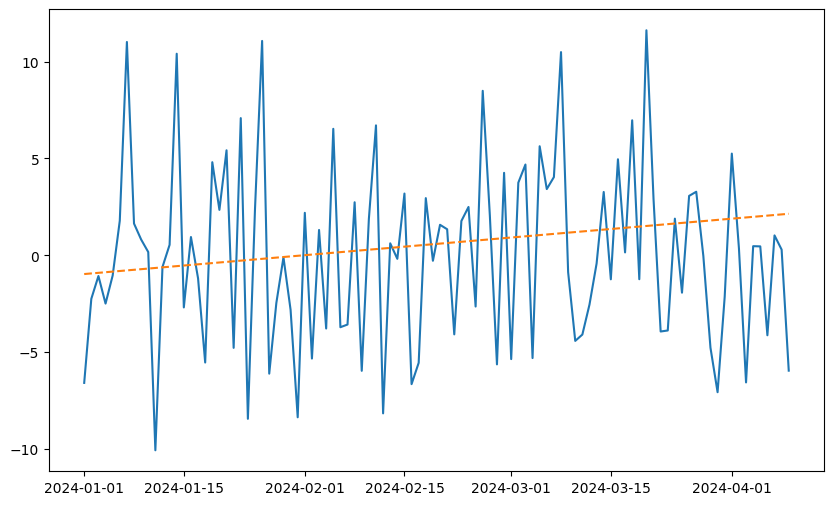

In [116]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(data['date'], data['value'], label='True Value')
plt.plot(data['date'], model.predict(X), label='Predict Value', linestyle='--')
plt.show()